# Secante e Cossecante na circunferencia trigonométrica

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
def draw_circunference(ax, angle = 2 * np.pi, radius = 1, x = 0, y = 0, color = 'tab:blue', fill_color = None, fill_opacity = 1, close_lines = False):
    """!
    Draw a circunference or semi-circunference on `ax` plot, from `matplotlib`.

    @param ax *: ax obtained with `matplotlib`.
    @param angle Float: a angle in rad.
    @param radius Float: the radius of the circunference.
    @param x Float: the x where to draw the circunference.
    @param y Float: the y where to draw the circunference.
    @param color String: the color of the circunference.
    @param fill_color String: the color of the inner part of a circunference or semi-circunference. If set to `None` it will have no innner-color.
    @param fill_opacity Float: the opacity of the inner color of the inner-circunference.
    @param close_lines Bool: if set to True and the absolute value of the `angle` is < 2 * PI it will close the semi-circufenrence in relation to the `(x, y)` cordinates.
    @param angle_tag: the name of the `angle` to be writen inside the circunference.
    """
    
    ang_sign = 1 if angle >= 0 else -1
    angle_mod = angle if np.abs(angle) <= 2 * np.pi else 2 * np.pi
    cos_angle = np.cos(angle_mod)
    sin_sign = 1 if np.sin(angle) >= 0 else -1

    tam = int(radius * 10000) - int(radius * 10000)%2

    angle_x = np.linspace(cos_angle * radius + x, radius + x, tam)
    angle_y = np.sqrt(1 - ((angle_x - x) / radius)**2) * radius * ang_sign + y

    ax.plot(angle_x, angle_y, color)

    base_xr = x, radius
    base_yr = y , y
    up_xr = x, radius * cos_angle
    up_yr = y, sin_sign * radius * np.sqrt(1 - cos_angle ** 2)

    if close_lines and angle_mod != 2 * np.pi:
        ax.plot(base_xr, base_yr, color)
        ax.plot(up_xr, up_yr, color)

    if np.abs(angle_mod) > np.pi:
        x_comp = np.linspace(-radius + x, cos_angle * radius + x, int(radius * 10000))
        y_comp = np.sqrt(1 - ((x_comp - x) / radius)**2) * radius * ang_sign + y
        ax.plot(x_comp, y_comp, color)
        ax.plot(x_comp, -y_comp, color)
        if (fill_color != None):
            ax.fill_between(x_comp, y_comp, color = fill_color, alpha = fill_opacity, linewidth = 0)
            if np.abs(angle_mod) > 3 * np.pi / 2:
                ax.fill_betweenx(-y_comp, x_comp, color = fill_color, alpha = fill_opacity, linewidth = 0)
            else:
                ax.fill_between(x_comp, -y_comp, color = fill_color, alpha = fill_opacity, linewidth = 0)
    if (fill_color != None):
        if np.abs(angle_mod) <= np.pi / 2 or (np.abs(angle_mod) > np.pi and np.abs(angle_mod) <= 3 * np.pi / 2):
            ax.fill_between(angle_x, angle_y, color = fill_color, alpha = fill_opacity, linewidth = 0)
            ax.fill_between(up_xr, up_yr, color = fill_color, alpha = fill_opacity, linewidth = 0)
        elif np.abs(angle_mod) <= np.pi:
            ax.fill_betweenx(angle_y, angle_x, color = fill_color, alpha = fill_opacity, linewidth = 0)
            ax.fill_betweenx(up_yr, up_xr, color = fill_color, alpha = fill_opacity, linewidth = 0)
        else:
            ax.fill_between(angle_x, angle_y, color = fill_color, alpha = fill_opacity, linewidth = 0)
            ax.fill_betweenx(up_yr, up_xr, color = fill_color, alpha = fill_opacity, linewidth = 0)


In [4]:
cos_x = np.linspace(-1, 1, 10000)
sin_y = np.sqrt(1 - cos_x**2)

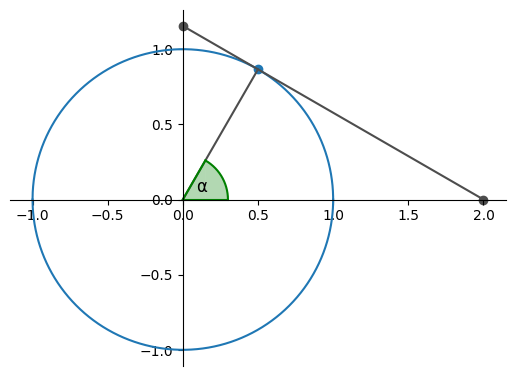

In [206]:
fig, ax = plt.subplots()

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.set_aspect('equal')

draw_circunference(ax)

alpha = np.pi / 3

alpha_arq = np.cos(alpha), np.sin(alpha)
ax.scatter(alpha_arq[0], alpha_arq[1], color='tab:blue')

sec_alpha = 1 / alpha_arq[0]
ax.scatter(sec_alpha, 0, color='#4d4d4d')

cossec_alpha = 1 / alpha_arq[1]
ax.scatter(0, cossec_alpha, color='#4d4d4d')

ax.plot((0, alpha_arq[0]), (0, alpha_arq[1]), '#4d4d4d')

draw_circunference(ax, alpha, .3, color = 'green', fill_color = 'green', fill_opacity = .3, close_lines = True)
ax.text(.1 * np.cos(alpha/2), .1 * np.sin(alpha/2), 'α', fontsize = 12)

ax.plot((sec_alpha, 0), (0, cossec_alpha), '#4d4d4d')

plt.show()